In [124]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from summarytools import dfSummary
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium
from folium.plugins import MarkerCluster
from folium.features import GeoJson

**EDA "Exploratory Data Analysis"**

In [67]:
df_siniestro = pd.read_csv("Datasets/siniestro.csv")

In [68]:
df_siniestro.head()


,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_EDAD,N_VICTIMAS,FECHA,AAAA,MM,...,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ID_y,OBJETO,BARRIOS,PERIMETRO,AREA,DIA SEMANA
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01,Menos de 20,1,2016-01-01,2016,1,...,-34.687570,MOTO-AUTO,MOTO,AUTO,12.0,LIMITE COMUNAL,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,20935.012513,2.221690e+07,Viernes
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02,Entre 61-80,1,2016-01-02,2016,1,...,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,5.0,LIMITE COMUNAL,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,Sabado
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03,Entre 21- 40,1,2016-01-03,2016,1,...,-34.631894,MOTO-AUTO,MOTO,AUTO,14.0,LIMITE COMUNAL,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,Domingo
3,2016-0004,CONDUCTOR,MASCULINO,18,2016-01-10,Menos de 20,1,2016-01-10,2016,1,...,-34.680930,MOTO-SD,MOTO,SD,12.0,LIMITE COMUNAL,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,20935.012513,2.221690e+07,Domingo
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01,Entre 21- 40,1,2016-01-21,2016,1,...,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,14.0,LIMITE COMUNAL,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,Jueves


In [69]:
df_siniestro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   ROL                    717 non-null    object 
 2   SEXO                   717 non-null    object 
 3   EDAD                   717 non-null    int64  
 4   FECHA_FALLECIMIENTO    717 non-null    object 
 5   RANGO_EDAD             717 non-null    object 
 6   N_VICTIMAS             717 non-null    int64  
 7   FECHA                  717 non-null    object 
 8   AAAA                   717 non-null    int64  
 9   MM                     717 non-null    int64  
 10  DD                     717 non-null    int64  
 11  HORA                   717 non-null    object 
 12  HH                     716 non-null    float64
 13  LUGAR_DEL_HECHO        717 non-null    object 
 14  TIPO_DE_CALLE          717 non-null    object 
 15  Calle 

Hagamos el estudio de los Outliers.

In [70]:
fig = px.scatter(df_siniestro["N_VICTIMAS"],y = 'N_VICTIMAS',width=1200,height=300)

In [71]:
fig.show()

podemos observar en  el grafico que  la mayoria de los siniestros son de  una persona, los outliers se observan  cuando las victimas son dos personas y otra extrema cuando son 3 victimas fallecidas. estos datos hay  debemos hacerle ninguna modificación ya que son importante para nuestros estudios.

Veamos como se observa la cantidad de numero de victimas de manera en grafica de barras.

Text(0.5, 1.0, 'Diagrama de Barras - Número de Víctimas')

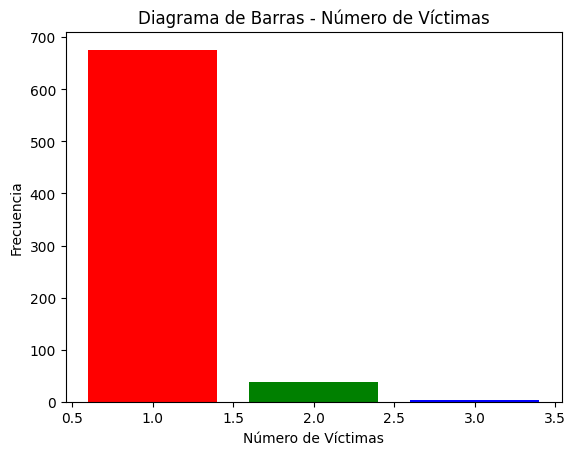

In [72]:
fig, ax = plt.subplots()
counts = df_siniestro["N_VICTIMAS"].value_counts().sort_index()
colors = ['red', 'green', 'blue']
ax.bar(counts.index, counts.values,color=colors)
ax.set_xlabel("Número de Víctimas")
ax.set_ylabel("Frecuencia")
ax.set_title("Diagrama de Barras - Número de Víctimas")

Conclusión:
Se confirma con el diagrama de barras que la mayoria de victimas fatales son  de una persona.  Sin embargo  a pesar que  el 75 % corresponde a una sola vicitma,  sigue siendo preocupante de 2 y 3 victimas fatales.

In [73]:
df_agrupado = df_siniestro.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()

In [74]:
df_agrupado.head(14)

,AAAA,MM,N_VICTIMAS
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7
5,2016,6,14
6,2016,7,11
7,2016,8,13
8,2016,9,14
9,2016,10,12


In [75]:
data_grouped = df_agrupado.groupby("AAAA")["N_VICTIMAS"].sum()

# Imprime los resultados
print(data_grouped)

AAAA
2016    150
2017    160
2018    161
2019    106
2020     87
2021     97
Name: N_VICTIMAS, dtype: int64


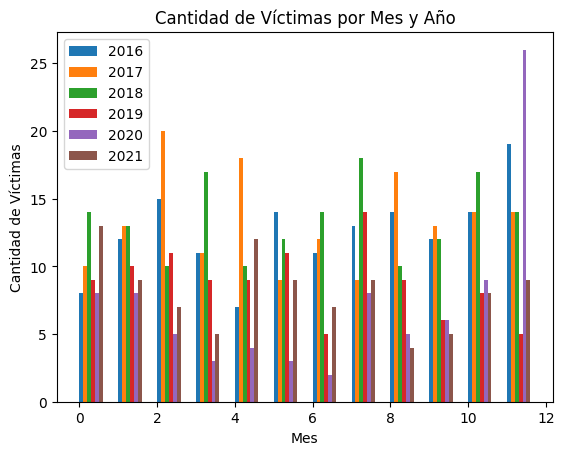

In [76]:


# Crea una figura y un eje
fig, ax = plt.subplots()

# Agrupa los datos por año y mes y calcula la suma de víctimas para cada combinación
data_grouped = df_agrupado.groupby(["AAAA", "MM"])["N_VICTIMAS"].sum()

# Obtiene los años únicos
years = df_agrupado["AAAA"].unique()

# Crea una lista de colores utilizando la paleta "tab10" de Matplotlib
colors = plt.cm.tab10.colors

# Calcula el ancho de cada barra (reducido para hacer las barras más finas)
bar_width = 0.1

# Crea el gráfico de barras
for i, year in enumerate(years):
    data = data_grouped[year]
    x = [j + i * bar_width for j in range(len(data))]
    ax.bar(x, data, width=bar_width, align="edge", color=colors[i % len(colors)], label=str(year))

# Personaliza el gráfico
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Víctimas")
ax.set_title("Cantidad de Víctimas por Mes y Año")
ax.legend()

# Muestra el gráfico
plt.show()

Conclusion:
- Podemos observar que  los años  2016, 2017 y 2019 en  el primer trimestre tienen un incremento proporcional. 
- En el año 2018 podemos corroborar que es el año donde hubo mas accidentes. teniendo como punto de inflexión el mes de agosto.
- El año 2020 es sumamente interesate, ya que hubo una gran disminución por la llegada del COVID 19, la cual fue decretada el 11 de marzo de ese año. observamos una disminución sucesiva, llegando a valores minimos en el mes de julio. Sin embago en el mes de diciembre fue el evento donde hubo maw siniestro en todo el estudio que realizamos, para un total de 26 victimas fatales.


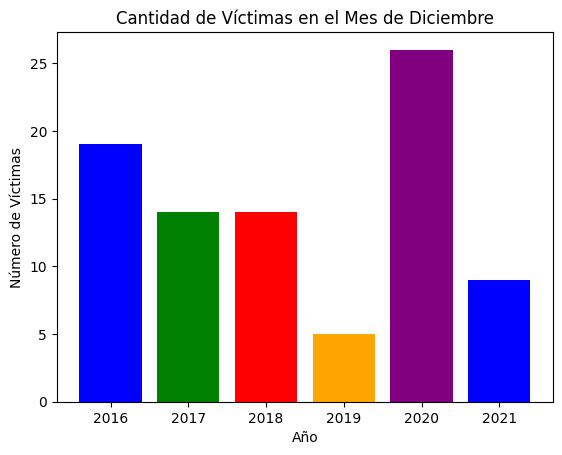

In [77]:
# Filtra los datos para incluir solo el mes de diciembre Donde hubo el mayor numero de victimas
df_diciembre = df_agrupado[df_agrupado["MM"] == 12]

# Crea una figura y un eje
fig, ax = plt.subplots()

# Crea una lista de colores para asignar a cada barra
colores = ["blue", "green", "red", "orange", "purple"]  # Puedes agregar más colores si es necesario

# Crea el gráfico de barras
ax.bar(df_diciembre["AAAA"], df_diciembre["N_VICTIMAS"], color=colores)

# Personaliza el gráfico
ax.set_xlabel("Año")
ax.set_ylabel("Número de Víctimas")
ax.set_title("Cantidad de Víctimas en el Mes de Diciembre")

# Muestra el gráfico
plt.show()

Aca corroboramos con detalle el mes de Diciembre  del año 2020 donde hubo la mayor cantidad de vicitimas fatales.

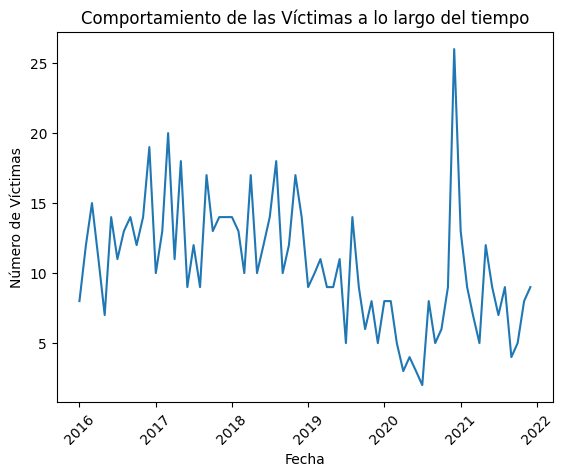

In [78]:
fig, ax = plt.subplots()

# Crea una columna de fecha combinando las columnas "AAAA" y "MM"
df_agrupado["Fecha"] = pd.to_datetime(df_agrupado["AAAA"].astype(str) + "-" + df_agrupado["MM"].astype(str), format="%Y-%m")

# Ordena el DataFrame por la columna "Fecha"
df_agrupado = df_agrupado.sort_values("Fecha")

# Crea el gráfico de líneas
ax.plot(df_agrupado["Fecha"], df_agrupado["N_VICTIMAS"])

# Personaliza el gráfico
ax.set_xlabel("Fecha")
ax.set_ylabel("Número de Víctimas")
ax.set_title("Comportamiento de las Víctimas a lo largo del tiempo")

# Rota las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()

Esta es una grafica adicional donde observamos el comportamiento progresivo de los accidentes en todo el periodo estudiado, desde el 2016 hasta el 2022, podemos notar   un comportamiento senosoidal en el primer trimestre, para luego ver la disminución de vicitmas dada la llegada de la pandemia en el año 2020 y ver el punto de inflexión las representativo de los accidentes. 

In [79]:

df_agruPEdad = df_siniestro.groupby(['EDAD'])['N_VICTIMAS'].sum().reset_index()


In [80]:
df_agruPEdad.head(3)

,EDAD,N_VICTIMAS
0,1,3
1,4,2
2,5,1


In [81]:
df_agruPEdad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   EDAD        85 non-null     int64
 1   N_VICTIMAS  85 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


In [82]:
df_agruPEdad.head()

,EDAD,N_VICTIMAS
0,1,3
1,4,2
2,5,1
3,7,1
4,10,3


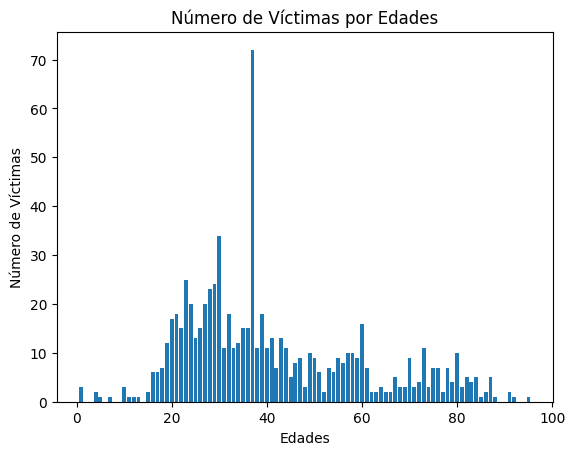

In [83]:
plt.bar(df_agruPEdad['EDAD'], df_agruPEdad['N_VICTIMAS'])

# Etiquetas de los ejes
plt.xlabel('Edades')
plt.ylabel('Número de Víctimas')

# Título del gráfico
plt.title('Número de Víctimas por Edades')

# Mostrar la gráfica
plt.show()

conclusión: Aca podemos  observar que la mayoria de los accidentes son personas que tienen edades entre los 20 a 40 años de edad en promedio.

Vamos a realizar el estudio con respecto a la Edad, Horas con el numero de victimas. 

In [84]:
data = df_siniestro.groupby(['EDAD', "HH","SEXO"])['N_VICTIMAS'].sum().reset_index()

In [85]:
data.head()

,EDAD,HH,SEXO,N_VICTIMAS
0,1,9.0,MASCULINO,2
1,1,17.0,MASCULINO,1
2,4,7.0,MASCULINO,1
3,4,23.0,MASCULINO,1
4,5,16.0,MASCULINO,1


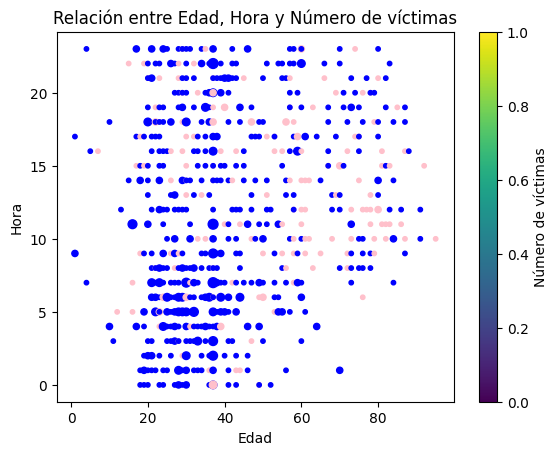

In [86]:

# Crear una lista de colores para el sexo
colores = ['blue' if sexo == 'MASCULINO' else 'pink' for sexo in data['SEXO']]

# Crear la gráfica de dispersión con puntos más grandes y colores diferentes según el sexo
plt.scatter(data['EDAD'], data['HH'], s=data['N_VICTIMAS']*10, c=colores)

# Personalizar la gráfica
plt.title('Relación entre Edad, Hora y Número de víctimas')
plt.xlabel('Edad')
plt.ylabel('Hora')
plt.colorbar(label='Número de víctimas')

# Mostrar la gráfica
plt.show()

Conclusión:
- Aca observamos que el numero de accidente ocurren en  los siguientes horarios: 2 am hasta la 10 am  y vuelve un aumento 17 hasta las 22 de la noche.
- Se Observa que en su gran mayoria  los fallecidos son hombres.

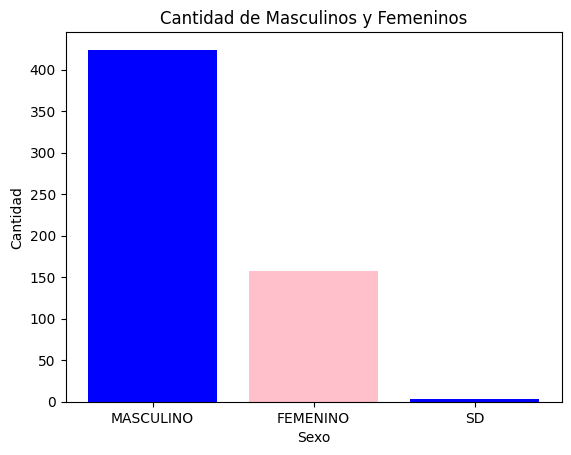

In [87]:


# Contar la cantidad de masculinos y femeninos
conteo_sexo = data['SEXO'].value_counts()

# Crear la gráfica de barras con color personalizado
plt.bar(conteo_sexo.index, conteo_sexo.values, color=['blue', 'pink'])

# Personalizar la gráfica
plt.title('Cantidad de Masculinos y Femeninos')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()

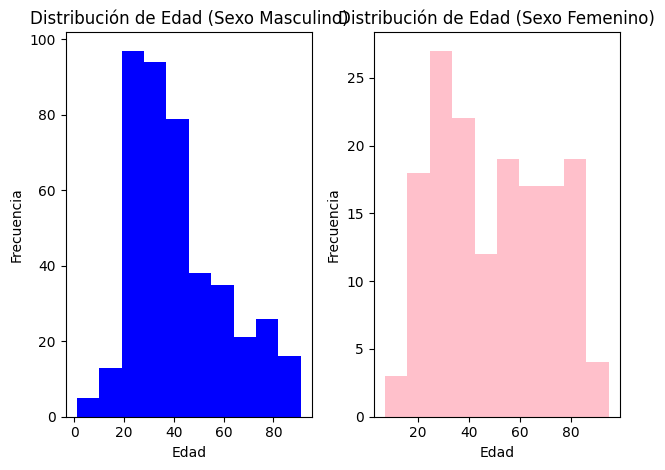

In [88]:
data_masculino = data[data['SEXO'] == 'MASCULINO']

# Filtrar los datos por sexo femenino
data_femenino = data[data['SEXO'] == 'FEMENINO']

# Crear las gráficas de barras
plt.subplot(1, 2, 1)
plt.hist(data_masculino['EDAD'], bins=10, color='blue')
plt.title('Distribución de Edad (Sexo Masculino)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(data_femenino['EDAD'], bins=10, color='pink')
plt.title('Distribución de Edad (Sexo Femenino)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Conclusiones:
- Con respecto a la edad de las victimas de los hombres, el promedio de edad es entre los 20 a 40 años en su mayoria.
- En el caso femenino tiende un poco mas a la derecha, entre 40 a  65 años de edad  donde se ve mas reflejo de victimas femeninas.


Vamos Hacer el estudio de los siniestro en las distintas comunas de la ciudad de buenos Aires.

In [89]:
df_Comunas_BA  = df_siniestro[['COMUNAS','BARRIOS','LUGAR_DEL_HECHO','N_VICTIMAS', 'pos x', 'pos y']].copy()

In [90]:
df_Comunas_BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COMUNAS          717 non-null    int64  
 1   BARRIOS          715 non-null    object 
 2   LUGAR_DEL_HECHO  717 non-null    object 
 3   N_VICTIMAS       717 non-null    int64  
 4   pos x            704 non-null    float64
 5   pos y            704 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 33.7+ KB


In [91]:
df_Comunas_BA.to_csv('Datasets/comunas_coorde.csv')

En este punto tuvimos que extraer el dataset  para anexar de forma externa los valores faltantes de las corrdenadas pos x y pos y que faltaban. usando herramientas de google.

Estos fueron los valores que tuvimos que anexar a nuestro dataset: 


39 AUTOPISTA LUGONES PK 10000 ;             -34.54820444296685, -58.43859582001778
108 AU BUENOS AIRES - LA PLATA KM. 4;         -34.60981858571728, -58.36740671898402
141 AUTOPISTA 25 DE MAYO	         ;        -34.63560916890574, -58.45373126649149
182 AV. LEOPOLDO LUGONES PKM 6900     ;      -34.548160258960955, -58.438585091182624
186 AU PERITO MORENO Y RAMAL ENLACE AU1/AU6; -34.628451123078065, -58.49338185741402
187	AU PERITO MORENO Y RAMAL ENLACE AU1/AU6 ;-34.628451123078065, -58.49338185741402
188 AU DELLEPIANE 2400	                    ;-34.66904179845834, -58.475578133505145
266 AU ARTURO FRONDIZI PKM 3100             ;-34.63751849976334, -58.376806262342065
327 AUTOPISTA LUGONES KM 4.7               ; -34.548257463742935, -58.43853144700679
564 LUGONES, LEOPOLDO AV. KM 6,1	       ; -34.54826630053567, -58.438552904677124
578	MURGUIONDO 2700	                       ; -34.662998175302405, -58.49326682749131
642 AU BUENOS AIRES LA PLATA KM 4,5        ; -34.670604101331634, -58.305525170500346

In [92]:

df_Comunas_BA2 = pd.read_csv('Datasets/comunas_coorde.csv', index_col=0)


In [93]:
df_Comunas_BA2.head()

,COMUNAS,BARRIOS,LUGAR_DEL_HECHO,N_VICTIMAS,pos x,pos y
0,8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,1,-58.475340,-34.687570
1,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,AV GRAL PAZ Y AV DE LOS CORRALES,1,-58.508775,-34.669777
2,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,AV ENTRE RIOS 2034,1,-58.390403,-34.631894
3,8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,1,-58.465039,-34.680930
4,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,1,-58.387183,-34.622466


procedo a elimniar los valores faltantes ya que son solo 2  en la columna BARRIOS Y 1 en pos x y pos y


In [95]:
df_Comunas_BA2.dropna(inplace=True)

In [96]:
valores_faltantes = df_Comunas_BA2.isnull().sum()
print(valores_faltantes)

COMUNAS            0
BARRIOS            0
LUGAR_DEL_HECHO    0
N_VICTIMAS         0
pos x              0
pos y              0
dtype: int64


Aca hice el proceso investigando por GOOGLE MAPS, esto lo hice pq el proceso estaba tardando mucho tiempo el codigo que esta mas abajo, duro  35 minutos en genrar los resultados. 

In [125]:
geolocator = Nominatim(user_agent="myGeocoder", timeout=10)

def obtener_coordenadas_direccion(direccion):
    try:
        location = geolocator.geocode(direccion)
        if location:
            return location.latitude, location.longitude
    except:
        pass
    
    return None

# Iterar sobre las filas del DataFrame y buscar las coordenadas
for index, row in df_Comunas_BA.iterrows():
    direccion = row['LUGAR_DEL_HECHO']
    coordenadas = obtener_coordenadas_direccion(direccion)
    if coordenadas:
        latitud, longitud = coordenadas
        df_Comunas_BA.at[index, 'pos x'] = latitud
        df_Comunas_BA.at[index, 'pos y'] = longitud

# Imprimir el DataFrame actualizado con las coordenadas
print(df_Comunas_BA)

     COMUNAS                                            BARRIOS  \
0          8     VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI   
1          9            LINIERS - MATADEROS - PARQUE AVELLANEDA   
2          1  CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...   
3          8     VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI   
4          1  CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...   
..       ...                                                ...   
712        3                          BALVANERA - SAN CRISTOBAL   
713        7                          FLORES - PARQUE CHACABUCO   
714        9            LINIERS - MATADEROS - PARQUE AVELLANEDA   
715       11  VILLA DEL PARQUE - VILLA  DEVOTO - VILLA GRAL....   
716        9            LINIERS - MATADEROS - PARQUE AVELLANEDA   

                               LUGAR_DEL_HECHO  N_VICTIMAS      pos x  \
0    AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ           1 -58.475340   
1            AV GRAL PAZ  Y AV DE LOS CORRALES   

vamos a crear el mapa   de los accidentes en Buenos Aires.

In [105]:
map = folium.Map(location=[-34.6037, -58.3816], zoom_start=11)  # Set the initial location and zoom level

In [110]:
marker_cluster = MarkerCluster().add_to(map)

In [111]:
# Add markers to the marker cluster layer
for index, row in df_Comunas_BA2.iterrows():
    folium.Marker([row['pos y'], row['pos x']], popup=row['LUGAR_DEL_HECHO']).add_to(marker_cluster)



# Display the map
map

Vamos hacer el estudio por Comunas para  corroborar con el mapa donde estan concentrados la  mayor cantidad de  accidente viales.

In [112]:
df_Comunas_BA2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704 entries, 0 to 716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COMUNAS          704 non-null    int64  
 1   BARRIOS          704 non-null    object 
 2   LUGAR_DEL_HECHO  704 non-null    object 
 3   N_VICTIMAS       704 non-null    int64  
 4   pos x            704 non-null    float64
 5   pos y            704 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 38.5+ KB


In [115]:
agrupado = df_Comunas_BA2.groupby('COMUNAS').agg({'BARRIOS': 'first', 'LUGAR_DEL_HECHO': 'first', 'N_VICTIMAS': 'sum'}).sort_values('N_VICTIMAS', ascending=False)

In [118]:
agrupado.head(15)

,BARRIOS,LUGAR_DEL_HECHO,N_VICTIMAS
COMUNAS,,,
1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,AV ENTRE RIOS 2034,101
4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...,82
9,LINIERS - MATADEROS - PARQUE AVELLANEDA,AV GRAL PAZ Y AV DE LOS CORRALES,74
8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,71
7,FLORES - PARQUE CHACABUCO,AV DIRECTORIO Y CURAPALIGUE,65
3,BALVANERA - SAN CRISTOBAL,AV CORRIENTES Y AV CALLAO,48
15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,AV SCALABRINI ORTIZ Y VERA,47
12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,HOLMBERG Y VEDIA,43
13,BELGRANO - COLEGIALES - NUÃ‘EZ,AV GRAL PAZ Y AV DEL LIBERTADOR,39


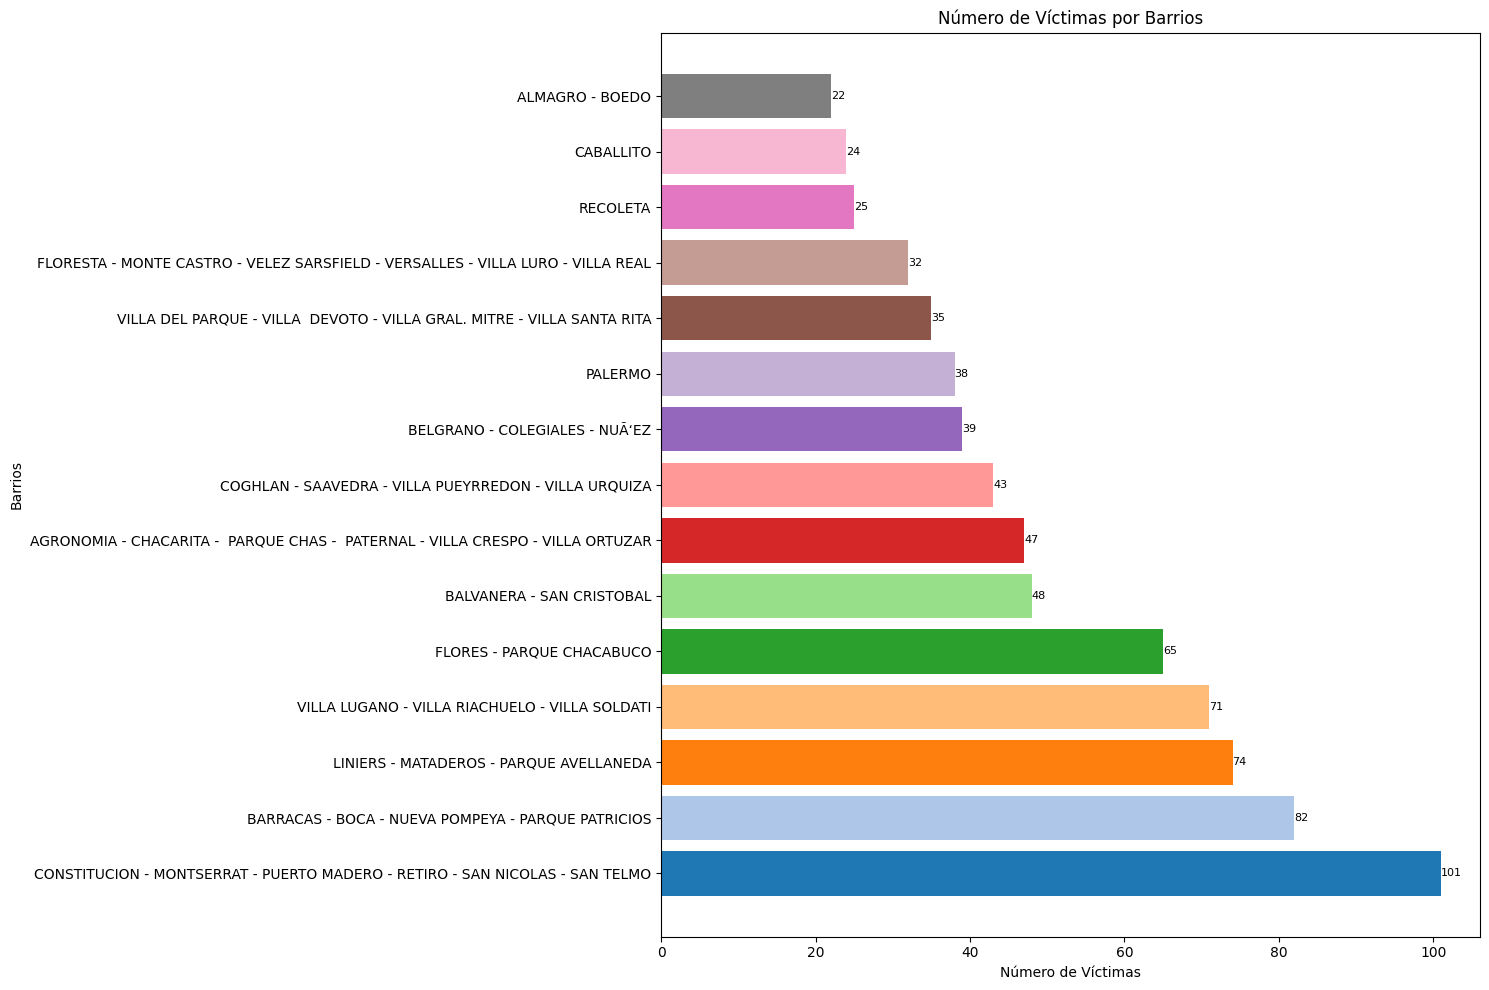

In [141]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 10))

# Colores para las barras

colores = plt.cm.tab20(range(len(agrupado)))
# Dibujar las barras horizontales
plt.barh(agrupado["BARRIOS"], agrupado["N_VICTIMAS"], color=colores)

# Etiquetas de eje x e y
plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Título del gráfico
plt.title('Número de Víctimas por Barrios')

# Agregar el número de víctimas sobre cada barra
for i, v in enumerate(agrupado["N_VICTIMAS"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')


plt.tight_layout()
plt.show()